# Membre du groupe
- SANOU Mohamed Bachir
- OUEDRAOGO David Pascal Pawindtaoré

Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Chargement des données sur les chansons nigérianes

In [2]:
data = pd.read_csv('nigerian-songs.csv')

Affichage des données

In [3]:
data

name                         album  \
0                      Sparky            Mandy & The Jungle   
1                  shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                       LITT!                         LITT!   
3    Confident / Feeling Cool               Enjoy Your Life   
4                  wanted you                         rare.   
..                        ...                           ...   
525                   Kwaroro                       Kwaroro   
526             Concert Party                   Afro Escape   
527                      Loko                    Applaudise   
528                      Gift                    Applaudise   
529                    Macoma                    Applaudise   

                  artist artist_top_genre  release_date  length  popularity  \
0          Cruel Santino  alternative r&b          2019  144000          48   
1    Odunsi (The Engine)          afropop          2020   89488          30   
2                   AYLØ        indie r&b          2018  207758          40   
3             Lady Donli     nigerian pop          2019  175135          14   
4    Odunsi (The Engine)          afropop          2018  152049          25   
..                   ...              ...           ...     ...         ...   
525           J. Martins   afro dancehall          2015  193960          10   
526      Various Artists   afro dancehall          2015  252708           0   
527               Iyanya   afro dancehall          2015  223159           0   
528               Iyanya   afro dancehall          2015  278280           0   
529               Iyanya   afro dancehall          2015  213426           0   

     danceability  acousticness  energy  instrumentalness  liveness  loudness  \
0           0.666        0.8510   0.420          0.534000    0.1100    -6.699   
1           0.710        0.0822   0.683          0.000169    0.1010    -5.640   
2           0.836        0.2720   0.564          0.000537    0.1100    -7.127   
3           0.894        0.7980   0.611          0.000187    0.0964    -4.961   
4           0.702        0.1160   0.833          0.910000    0.3480    -6.044   
..            ...           ...     ...               ...       ...       ...   
525         0.735        0.6320   0.918          0.193000    0.0718    -2.582   
526         0.602        0.1770   0.883          0.000004    0.1190    -6.183   
527         0.729        0.2380   0.864          0.000000    0.1950    -3.942   
528         0.809        0.0490   0.806          0.000000    0.0659    -6.547   
529         0.816        0.1140   0.961          0.008500    0.1370    -2.204   

     speechiness    tempo  time_signature  
0         0.0829  133.015               5  
1         0.3600  129.993               3  
2         0.0424  130.005               4  
3         0.1130  111.087               4  
4         0.0447  105.115               4  
..           ...      ...             ...  
525       0.0355  127.954               4  
526       0.0778  154.010               4  
527       0.0668  121.058               4  
528       0.2340  123.997               4  
529       0.1390  106.972               4  

[530 rows x 16 columns]

Informations génerale sur les données

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

Verification de la presence de données manquantes


In [5]:
data.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

Verification de la présence de genres musicaux non classé sur spotify. Ces genres musicaux sont mentionnés par 'Missing'

In [6]:
data[data['artist_top_genre'] == 'Missing']  

#il existe donc des genre musicaux non classé

name  \
47                        Walk With Me   
87                             Finally   
103                              Oruka   
105                              Obimo   
135                            Lori Le   
139                             Kokoma   
147                           Fi Mi Le   
158                  Nigeria Jaga Jaga   
172                   Bomper to Bomper   
187              You Know It ft. Eldee   
196                            Bastard   
219                         Afro Lover   
222                           Slide In   
229                          Like This   
234                         Bubble Bup   
237                          Adore Her   
251  Shout Out Trap (feat. Wande Coal)   
258                    Pass The Agbara   
263                            Go Down   
264                           Far Away   
270                              Salsa   
275                              I.J.N   
282                         Sexy Girls   
290                              IZZUE   
316                      Wetin We Gain   
353                             Teyamo   
355                            Ubi Ego   
356                            Igbotic   
385                       Sisi (Remix)   
392                       Ife Adigomma   
397                            Sangolo   
407                              Shake   
418                         Sexy Rosey   
423                            Wake Up   
426                          Yori Yori   
427                          Salambala   
442                            Kum Kum   
445                             Myself   
449                  Mummy Pray for Me   
450                             4 Life   
451  Sisi Maria (feat. Skales & Koker)   
452                            Tornado   
455                       Feel Alright   
459                          Commander   
460                           Angelina   
469                Caro (feat. Wizkid)   
470                              Dance   
475                                Say   
476            Gallardo (feat. Davido)   
489                  Oyo (On Your Own)   
501                               Welu   
507                            Magical   
508                        Poco A Poco   

                                           album                 artist  \
47                                  Walk With Me               Stormrex   
87                                       Finally           Master Kraft   
103                                      Legends        Various Artists   
105                                        Obimo              Kayswitch   
135                                   Turn It Up              X Project   
139                                       Kokoma                     K9   
147                               a.k.a Fi Mi Le                    Kas   
158                                    Old & New        Various Artists   
172                                 Nigeria Club        Various Artists   
187               You Know It - Single ft. Eldee                 Goldie   
196                                      Bastard      The Three Wisemen   
219                                   Afro Lover         Jilex Anderson   
222                                     Slide In                  Jilex   
229                                    Like This             DJ Henry X   
234                                   Bubble Bup         Cynthia Morgan   
237                            The Collectiv3 Lp        Various Artists   
251                                      Ballers            Dammy Krane   
258                              Pass The Agbara                  Skuki   
263                                      Go Down                   Julz   
264                                     Far Away           Master Kraft   
270                                        Salsa           Master Kraft   
275                                        I.J.N                 Pheelz   
282                                   Se

Examinons les genres. Il y en a plusieurs qui sont répertoriés comme 'Missing', ce qui signifie qu'ils ne sont pas catégorisés dans l'ensemble de données avec un genre. Affichons les plus coté

Text(0.5, 1.0, 'Top genres')

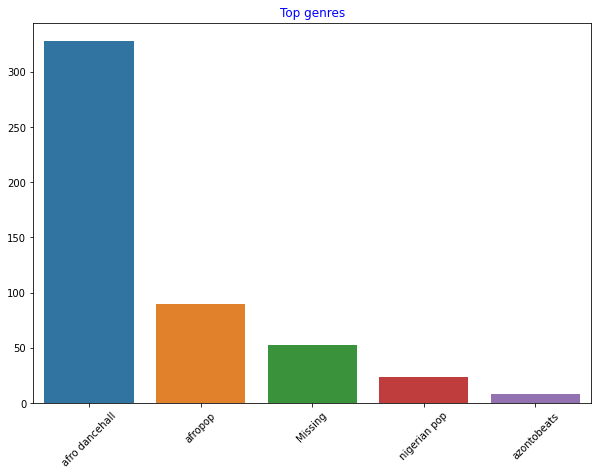

In [7]:
import seaborn as sns

top = data['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Supprimons les genres "Missing", car ils ne sont pas classés dans Spotify.

Text(0.5, 1.0, 'Top genres')

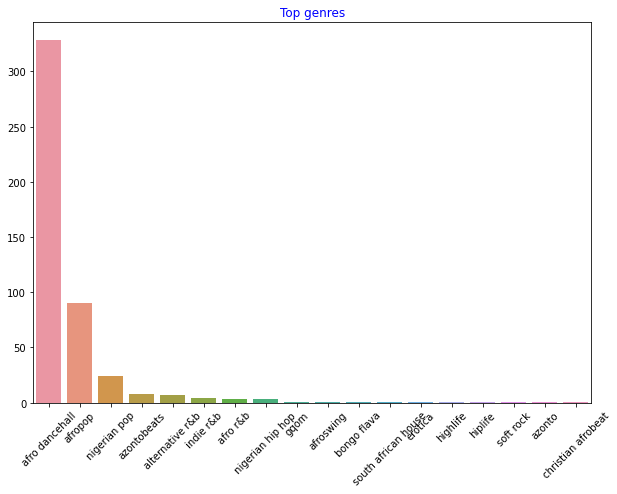

In [8]:
data = data[data['artist_top_genre'] != 'Missing']
top = data['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Les données ne sont pas fortement corrélées, sauf entre l'énergie et le volume sonore, ce qui est logique. La popularité est corrélée à la date de sortie, ce qui est également logique, car les chansons plus récentes sont probablement plus populaires. La durée et l'énergie semblent être corrélées - peut-être que les chansons plus courtes sont plus énergiques

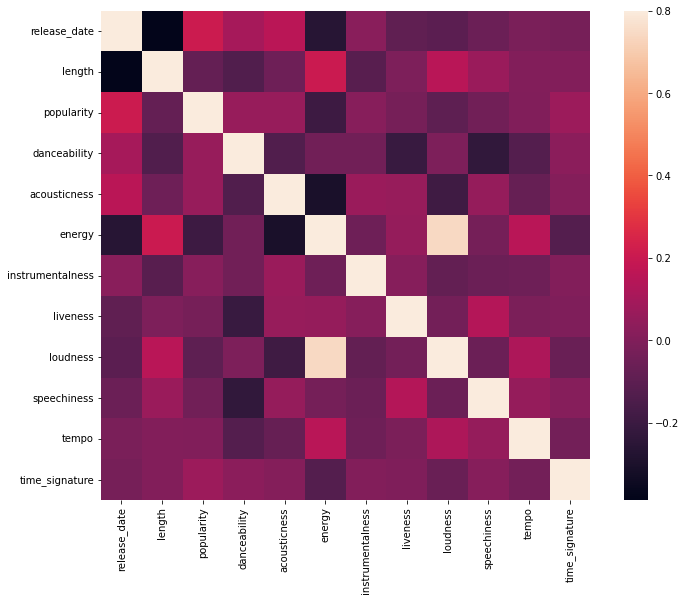

In [9]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Traitement 

Selection des colonnes pour nos algorithmes

In [10]:
data = data.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

Affichage des 5 premières lignes du dataset

In [11]:
data.head()

artist_top_genre  popularity  danceability  acousticness  loudness  energy
0  alternative r&b          48         0.666        0.8510    -6.699   0.420
1          afropop          30         0.710        0.0822    -5.640   0.683
2        indie r&b          40         0.836        0.2720    -7.127   0.564
3     nigerian pop          14         0.894        0.7980    -4.961   0.611
4          afropop          25         0.702        0.1160    -6.044   0.833

Encodage de la variable categorielle 'artist_top_genre

In [12]:

le = LabelEncoder()
data['artist_top_genre'] = le.fit_transform(data['artist_top_genre'])


Calcul de la matrice de distance

In [13]:
# Convertir les données en matrices numpy
numeric_data = np.array([
    data['artist_top_genre'],
    data['popularity'],
    data['danceability'],
    data['acousticness'],
    data['loudness'],
    data['energy']
]).T

# Calculer la matrice de distance euclidienne
distance_matrix = np.zeros((len(data), len(data)))
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        numeric_distance = np.linalg.norm(numeric_data[i] - numeric_data[j])
        distance_matrix[i, j] = numeric_distance 
        distance_matrix[j, i] = distance_matrix[i, j]

# Afficher la matrice de distance
print(distance_matrix)

[[ 0.         18.15994602 12.06515897 ... 48.25119608 48.17505322
  48.38453653]
 [18.15994602  0.         14.94246399 ... 30.1154545  30.0807028
  30.26376757]
 [12.06515897 14.94246399  0.         ... 42.18111935 42.0647765
  42.34877687]
 ...
 [48.25119608 30.1154545  42.18111935 ...  0.          2.61371575
   1.74728303]
 [48.17505322 30.0807028  42.0647765  ...  2.61371575  0.
   4.34625678]
 [48.38453653 30.26376757 42.34877687 ...  1.74728303  4.34625678
   0.        ]]


calcul de la matrice de similarité

In [14]:
# Définir le paramètre sigma pour la méthode du sigma
sigma = 1.0

# Calculer la matrice de similarité
similarity_matrix = np.exp(-distance_matrix**2 / (2 * sigma**2))

# Afficher la matrice de similarité
print(similarity_matrix)

[[1.00000000e+000 2.44564031e-072 2.45638922e-032 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [2.44564031e-072 1.00000000e+000 3.28069253e-049 ... 1.14908216e-197
  3.27043401e-197 1.30554410e-199]
 [2.45638922e-032 3.28069253e-049 1.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 1.14908216e-197 0.00000000e+000 ... 1.00000000e+000
  3.28515944e-002 2.17295087e-001]
 [0.00000000e+000 3.27043401e-197 0.00000000e+000 ... 3.28515944e-002
  1.00000000e+000 7.90860546e-005]
 [0.00000000e+000 1.30554410e-199 0.00000000e+000 ... 2.17295087e-001
  7.90860546e-005 1.00000000e+000]]


Calcul de matrice de degré

In [15]:
# Calculer la matrice de degré
degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))

# Afficher la matrice de degré
print(degree_matrix)

[[ 1.46468822  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          2.52973057  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          1.09211555 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 60.80462786  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         28.24199814
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  33.22899812]]


# 1ere methode

Inverse de la matrice de degré

In [16]:
degree_matrix_inv = np.linalg.inv(degree_matrix)

Affichage de la laplacienne normalisée

In [17]:
L = np.dot(degree_matrix_inv,similarity_matrix)
print("La laplacienne normalisée vaut : ")
for row in L:
    print(row)

La laplacienne normalisée vaut : 
[6.82739157e-001 1.66973441e-072 1.67707311e-032 7.26915130e-279
 7.03048701e-117 8.40853830e-135 9.57839597e-108 5.73812548e-102
 8.08676347e-059 2.41801166e-075 7.37667687e-050 6.21465877e-040
 6.82250213e-002 5.85235566e-163 1.62888074e-183 6.88083523e-279
 3.36289703e-255 1.10650294e-080 1.61235395e-001 1.26945862e-053
 1.86711543e-044 3.33734637e-144 6.76155265e-236 7.52665155e-034
 1.11555483e-030 1.78456174e-234 5.88707296e-068 6.66653233e-309
 1.24668909e-099 6.76169724e-224 1.46036764e-012 0.00000000e+000
 2.59815875e-268 1.86353733e-004 1.76465022e-015 2.04511641e-055
 2.60458226e-228 4.71707455e-013 8.29877943e-036 0.00000000e+000
 1.58831191e-034 1.21995141e-010 4.95719208e-016 4.44465614e-116
 0.00000000e+000 0.00000000e+000 6.17731208e-023 1.07840233e-097
 4.86014832e-149 1.90563863e-130 2.24724548e-152 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 2.06883483e-005 1.12357234e-113 2.86053960e-006 0.00000

Calcul des valeurs propres et des vecteurs propres

In [18]:
valeurs_propres, vecteurs_propres =np.linalg.eig(L)


In [19]:
print("Les valeurs propres sont: ",valeurs_propres)

Les valeurs propres sont:  [9.71931147e-01 9.65969658e-01 9.50521484e-01 9.55589610e-01
 9.52392090e-01 9.40700801e-01 9.27933259e-01 9.26416343e-01
 9.36450963e-01 8.99591698e-01 9.08228422e-01 9.07196659e-01
 9.06346658e-01 8.89729232e-01 8.86372941e-01 8.85912826e-01
 8.65374189e-01 8.59856381e-01 8.55387613e-01 8.46591349e-01
 8.77111533e-01 8.73941301e-01 5.67868805e-01 8.42301411e-01
 6.06536827e-01 6.16639367e-01 5.89080006e-01 5.88761647e-01
 6.30667368e-01 7.59327895e-01 7.47074671e-01 7.97821864e-01
 7.90279613e-01 7.91176307e-01 7.54828350e-01 6.51985934e-01
 6.44232040e-01 7.14586361e-01 7.19018600e-01 7.22069274e-01
 6.81369757e-01 6.80498521e-01 6.90786363e-01 7.03344121e-01
 7.26379890e-01 7.25711588e-01 7.02082507e-01 6.89744567e-01
 9.04667017e-01 9.37155399e-01 9.34688957e-01 9.19576818e-01
 9.34540430e-01 9.18164988e-01 8.28522221e-01 8.24198508e-01
 8.31209149e-01 7.92106192e-01 7.68413369e-01 7.75708707e-01
 7.04222008e-01 7.32703730e-01 7.67604873e-01 7.66124030e-

In [20]:
print("Les Vecteurs propres sont: ",vecteurs_propres)


Les Vecteurs propres sont:  [[-2.35993152e-01 -3.26865233e-02 -1.84535495e-01 ...  2.05572389e-19
  -2.50664379e-20  2.25376027e-20]
 [-4.77889711e-02 -2.15006513e-02 -5.10578979e-02 ... -1.84743301e-17
   2.25096868e-17 -1.18179537e-16]
 [-5.28136899e-16  1.94362701e-16 -2.00680802e-16 ... -3.59984984e-17
   5.85414773e-17 -2.44379172e-17]
 ...
 [ 2.72131058e-04 -1.35744541e-03 -1.53751819e-05 ...  3.41949928e-01
  -1.08192270e-02  6.64719386e-01]
 [ 3.27670557e-04 -1.71837673e-03 -2.28809127e-05 ... -3.14319549e-04
   2.22838799e-04 -1.27195604e-03]
 [ 2.53079952e-04 -1.23664604e-03 -1.30565410e-05 ...  1.96949512e-03
   5.52980783e-05  1.05179626e-03]]


In [21]:
# Obtenir les indices des plus petites valeurs propres
plus_petit_k_index = np.argsort(valeurs_propres)[:3]

# Afficher les indices des plus petites valeurs propres
print(plus_petit_k_index)

[475 476 474]


Calcul de la matrice u non normalisée

In [22]:

u = vecteurs_propres[plus_petit_k_index]

U = np.transpose(u)
print("La matrice U non normalisée est : ")
for row in U:
    print(row)

La matrice U non normalisée est : 
[0.00032767 0.00025308 0.00027213]
[-0.00171838 -0.00123665 -0.00135745]
[-2.28809127e-05 -1.30565410e-05 -1.53751819e-05]
[-0.00077951 -0.00048486 -0.00055598]
[-0.00018563 -0.00010951 -0.00012763]
[7.95546019e-05 3.66342332e-05 4.62310143e-05]
[5.04036012e-06 1.39990058e-06 2.13304249e-06]
[1.54103247e-05 3.85223703e-06 6.14294096e-06]
[-9.26422121e-05 -3.76575073e-05 -4.95962029e-05]
[ 1.18114916e-05 -2.23006997e-05 -2.05145164e-05]
[-4.75468276e-05  1.55463068e-05  7.36097310e-06]
[-1.17122088e-05  4.69858447e-06  2.67845970e-06]
[-0.00058487  0.00027628  0.00017502]
[3.70888865e-06 7.67399667e-06 9.13954371e-06]
[-5.78780002e-06 -1.01799128e-05 -1.05037201e-05]
[0.00012634 0.00020465 0.0002186 ]
[-1.89771316e-08 -9.71392844e-09 -1.46218922e-08]
[-9.42498970e-08 -3.90682656e-08 -6.43457408e-08]
[1.90094492e-05 6.59542695e-06 1.18378093e-05]
[3.59113011e-08 6.27264651e-09 1.77354367e-08]
[8.39458695e-08 7.04273007e-08 9.00181160e-08]
[-1.09026246e-

Calcul de la matrice normalisée T

In [23]:
k = 3
T = []
for i in range(0,len(vecteurs_propres)):
    ligne_t = []
    for j in range(0,k):
        sum_u_ij=0
        for y in range(0,k):
            sum_u_ij = sum_u_ij + (U[i][y]**2) 
        
        t_ij = U[i][j] / np.sqrt(sum_u_ij)
        ligne_t.append(t_ij)
    T.append(ligne_t)
    
print("La matrice U normalisée T est : ")
for row in T:
    print(row)

La matrice U normalisée T est : 
[0.6613567022341673, 0.5108061095861927, 0.5492580730579801]
[-0.6832757577433833, -0.49172585179598205, -0.5397591366116197]
[-0.7501311067011639, -0.4280475040546046, -0.5040621559211824]
[-0.7263157762072251, -0.4517743264799496, -0.5180399127153081]
[-0.7410954963515838, -0.4371982464926375, -0.5095440692925024]
[0.8032823973350856, 0.3699048699364325, 0.4668059311201056]
[0.8922064384714073, 0.24779981693576353, 0.3775750546272473]
[0.9048418697641288, 0.22619026067095438, 0.36069260693748806]
[-0.8299311045674008, -0.33735309121071155, -0.4443053606722648]
[0.363185102980582, -0.6857120318813203, -0.6307896561502693]
[-0.9403564286700843, 0.30746676988897625, 0.1455814977010611]
[-0.9078776702790766, 0.36421310526858475, 0.20762213215177927]
[-0.8728113324288316, 0.41229402378181523, 0.2611781306648924]
[0.2967801055169891, 0.6140625288099844, 0.7313335625286262]
[-0.3679283925176276, -0.647133443156976, -0.6677177582835367]
[0.38872536677507374, 

Definition des 3 centres initiaux

In [24]:
C1 = T[0]
C2 = T[1]
C3 = T[2]

cluster_c = np.array([C1, C2,C3])

In [25]:
cluster_c

array([[ 0.6613567 ,  0.51080611,  0.54925807],
       [-0.68327576, -0.49172585, -0.53975914],
       [-0.75013111, -0.4280475 , -0.50406216]])

application du Kmeans et representation (les centres initiaux sont en couleurs bleu)

c:\Users\SANOU Mohamed Bachir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


[0 1 1 1 1 0 0 0 2 1 2 2 2 0 1 0 2 2 0 0 0 1 0 2 1 2 1 0 1 1 1 2 2 0 2 2 1
 2 2 1 1 1 1 2 0 2 1 1 2 0 2 0 2 2 2 2 0 2 2 2 2 0 2 2 1 1 2 0 1 1 1 0 1 0
 0 2 0 0 1 1 1 2 0 1 0 0 1 2 1 1 2 1 0 1 1 0 0 2 1 0 0 2 2 1 0 1 1 0 0 1 0
 0 1 0 2 2 0 1 0 2 0 1 2 2 1 0 0 0 0 1 1 2 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1
 1 0 0 1 1 1 0 1 1 2 2 2 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 2 1 1 0
 0 1 1 2 2 0 0 1 0 0 0 1 1 0 0 0 2 1 0 1 1 2 2 2 1 0 1 1 2 1 1 0 1 2 1 2 1
 0 1 2 1 1 1 1 2 1 2 2 2 1 1 2 1 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 0 1 0 0 1 1
 0 1 1 1 0 2 1 2 1 1 2 2 0 0 0 0 1 2 2 2 0 2 1 2 2 0 0 0 0 1 0 2 1 2 0 2 2
 0 0 0 0 2 2 0 2 2 2 1 1 2 2 0 0 0 2 2 1 2 2 2 1 0 1 0 0 1 1 1 2 0 0 0 0 0
 1 1 2 1 2 2 1 0 2 2 2 0 0 1 2 2 1 0 1 2 2 1 2 0 2 1 1 0 0 1 2 1 2 0 1 2 1
 0 0 2 2 0 0 1 2 2 0 0 0 2 1 2 0 2 2 0 0 0 2 2 2 2 0 0 0 0 2 1 1 1 0 0 0 2
 1 1 2 2 0 1 2 0 1 2 2 2 1 0 0 0 0 0 1 0 1 2 2 1 0 0 1 2 2 0 0 0 1 0 1 1 1
 1 2 1 0 0 1 0 1 1 0 1 1 1 2 1 0 1 1 1 2 0 0 1 1 1 0 0 1 0 1 0 1 0]


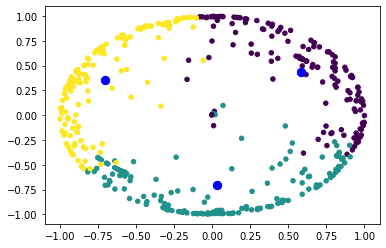

In [26]:
T = np.array(T)

kmeans = KMeans(n_clusters=k, init=[T[0],T[1],T[2]])
kmeans.fit(T)

print(kmeans.labels_)

# Visualisation
plt.scatter(T[:, 0], T[:, 1], c=kmeans.labels_, s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', s=70)
plt.show()

Affichage 3D

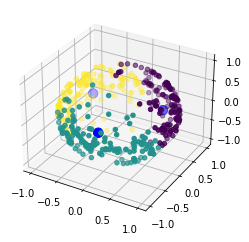

In [27]:
# %matplotlib # cette ligne permet d'ouvrir une fenêtre QT5 pour zoomer et bouger votre graphique !
from mpl_toolkits.mplot3d import Axes3D # module 3D de Matplotlib
 
ax = plt.axes(projection='3d') # Création d'un objet "axe 3D"
ax.scatter(T[:, 0], T[:, 1], T[:,2], c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', s=90)


In [28]:
# Calculer les moyennes des caractéristiques pour chaque cluster
cluster_means = data.groupby(kmeans.labels_).mean()

# Afficher les moyennes des caractéristiques pour chaque cluster
for i in range(k):
    print("Cluster", i+1)
    print(cluster_means.iloc[i])


Cluster 1
artist_top_genre     1.683230
popularity          17.832298
danceability         0.744894
acousticness         0.258631
loudness            -4.775472
energy               0.769609
Name: 0, dtype: float64
Cluster 2
artist_top_genre     1.609195
popularity          19.155172
danceability         0.735989
acousticness         0.275110
loudness            -5.196310
energy               0.751644
Name: 1, dtype: float64
Cluster 3
artist_top_genre     1.830986
popularity          17.894366
danceability         0.748352
acousticness         0.283421
loudness            -4.871465
energy               0.760958
Name: 2, dtype: float64


# 2ème méthode


Calculer l'inverse de la racine carrée des éléments diagonaux de D

In [29]:
# Calculer l'inverse de la racine carrée des éléments diagonaux de D
D_1_2 = np.diag(1 / np.sqrt(np.diag(degree_matrix)))

Calcul de la laplacienne normaliser

In [30]:
L1 = np.array(D_1_2).dot(similarity_matrix)

laplacian_normalize = L1.dot(D_1_2)
laplacian_normalize

array([[6.82739157e-001, 1.27052395e-072, 1.94218365e-032, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.27052395e-072, 3.95299014e-001, 1.97375889e-049, ...,
        9.26500439e-199, 3.86919436e-198, 1.42395343e-200],
       [1.94218365e-032, 1.97375889e-049, 9.15654027e-001, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 9.26500439e-199, 0.00000000e+000, ...,
        1.64461166e-002, 7.92757619e-004, 4.83418166e-003],
       [0.00000000e+000, 3.86919436e-198, 0.00000000e+000, ...,
        7.92757619e-004, 3.54082595e-002, 2.58162749e-006],
       [0.00000000e+000, 1.42395343e-200, 0.00000000e+000, ...,
        4.83418166e-003, 2.58162749e-006, 3.00941965e-002]])

In [31]:
valeurs_propres, vecteurs_propres =np.linalg.eig(laplacian_normalize)

print("Les valeurs propres sont: ",valeurs_propres)

Les valeurs propres sont:  [9.71931147e-01 9.78528983e-01 9.65969658e-01 9.55589610e-01
 9.50521484e-01 9.52392090e-01 9.40700801e-01 8.46591349e-01
 8.55387613e-01 8.59856381e-01 8.65374189e-01 9.36450963e-01
 9.37155399e-01 9.27933259e-01 9.26416343e-01 8.73941301e-01
 8.77111533e-01 8.89729232e-01 8.86372941e-01 8.85912826e-01
 8.99591698e-01 9.08228422e-01 9.07196659e-01 9.06346658e-01
 9.04667017e-01 8.42301411e-01 5.40931052e-01 5.51631011e-01
 7.59327895e-01 7.47074671e-01 7.54828350e-01 7.14586361e-01
 7.19018600e-01 7.22069274e-01 6.90786363e-01 7.03344121e-01
 5.67868805e-01 6.06536827e-01 6.30667368e-01 6.16639367e-01
 6.81369757e-01 6.89744567e-01 6.80498521e-01 6.51985934e-01
 6.44232040e-01 5.75760599e-01 5.89080006e-01 5.88761647e-01
 7.26379890e-01 9.63487182e-01 9.19576818e-01 9.34688957e-01
 9.34540430e-01 9.18164988e-01 6.38680751e-01 8.28522221e-01
 8.31209149e-01 7.02082507e-01 8.24198508e-01 7.25711588e-01
 7.97821864e-01 7.90279613e-01 7.91176307e-01 7.92106192e-

In [32]:
print("Les Vecteurs propres sont: ",vecteurs_propres)

Les Vecteurs propres sont:  [[ 1.76505298e-01  8.64270890e-02  2.53108147e-02 ...  1.16404344e-23
  -1.54549012e-23  8.34912514e-24]
 [ 4.69732453e-02 -6.32398884e-02  2.18803140e-02 ...  1.24111094e-16
  -7.31276145e-18 -6.66032778e-17]
 [-8.57218769e-16 -1.72667710e-15  3.34643975e-16 ... -4.68675483e-17
  -4.42915701e-17 -2.98063398e-17]
 ...
 [-1.31139094e-03  1.27980851e-03  6.77260100e-03 ...  3.43833268e-01
  -1.25309422e-02  6.66021453e-01]
 [-1.07614522e-03  9.98949201e-04  5.84293282e-03 ... -2.15395403e-04
   1.75895912e-04 -8.68563051e-04]
 [-9.01575535e-04  8.97778181e-04  4.56109203e-03 ...  1.46396504e-03
   4.73463746e-05  7.79061831e-04]]


In [33]:
# Obtenir les indices des plus grandes valeurs propres
plus_grand_k_index = np.argsort(valeurs_propres)[-3:]
# Afficher les indices des plus petites valeurs propres
print(plus_grand_k_index)

[261 331 260]


In [34]:
u = vecteurs_propres[plus_grand_k_index]
U = np.transpose(u)
print("La matrice U non normalisée est : ")
for row in U:
    print(row)

La matrice U non normalisée est : 
[-0.00087485 -0.00130239 -0.03904601]
[0.00075974 0.00126262 0.03628157]
[0.00507359 0.00677089 0.05988725]
[ 0.00274246  0.00293864 -0.12272972]
[-8.63484328e-05 -8.16581015e-05  6.56478884e-03]
[ 0.00086475  0.00085777 -0.08605905]
[-0.00039381 -0.0002783   0.0181914 ]
[-9.41982553e-08  1.07691891e-07  1.25877393e-04]
[ 5.41832515e-05 -5.70149833e-05 -8.14340317e-02]
[-3.84920795e-07  3.75812924e-07  6.20890434e-04]
[-1.11999560e-07  9.85157063e-08  1.68623547e-04]
[ 0.00050892  0.00030801 -0.0077356 ]
[ 4.90411045e-06  3.05018621e-06 -1.02446167e-04]
[-3.49273030e-05 -1.41410182e-05 -2.30956632e-03]
[1.18553078e-04 4.37767740e-05 1.05213928e-02]
[-9.22290051e-09  6.67660633e-09  1.08037346e-05]
[-1.04749610e-06  6.96452956e-07  1.04097376e-03]
[ 1.08598788e-04 -4.39818504e-05 -1.03259868e-01]
[ 1.07459106e-04 -5.41203423e-05  2.83548716e-02]
[-0.00307029  0.00155704  0.00372571]
[ 4.29166773e-04 -9.12324087e-05 -6.59360933e-02]
[-5.88166439e-04  1.

In [35]:

C1 = U[0]
C2 = U[1]
C3 = U[2]

cluster_c = np.array([C1,C2,C3])
cluster_c



array([[-0.00087485, -0.00130239, -0.03904601],
       [ 0.00075974,  0.00126262,  0.03628157],
       [ 0.00507359,  0.00677089,  0.05988725]])

Kmean et representation (les centres initiaux sont en couleurs bleu)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 0 0 1 1 1 1
 1 1 1 1 2 1 1 0 1 1 0 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 2 1 1 0
 1 0 1 0 0 2 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 2 1 1 1
 1 1 0 1 1 1 2 0 1 1 1 1 1 0 1 0 2 1 1 1 2 1 1 2 1 1 1 1 0 0 2 0 2 2 1 0 0
 1 1 1 1 2 0 1 0 1 2 1 0 2 1 0 0 2 2 1 0 1 2 0 0 2 1 1 1 2 0 1 1 1]


c:\Users\SANOU Mohamed Bachir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


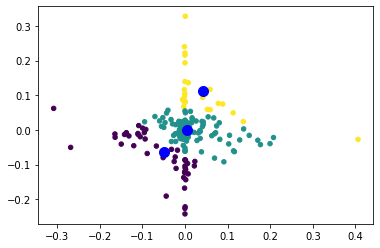

In [36]:
U = np.array(U)

kmeans = KMeans(n_clusters=k, init=[C1, C2,C3])
kmeans.fit(U)

print(kmeans.labels_)

# Visualisation
plt.scatter(U[:, 0], U[:, 1], c=kmeans.labels_, s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', s=100)
plt.show()

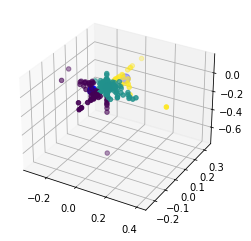

In [37]:
# %matplotlib # cette ligne permet d'ouvrir une fenêtre QT5 pour zoomer et bouger votre graphique !
from mpl_toolkits.mplot3d import Axes3D # module 3D de Matplotlib
 
ax = plt.axes(projection='3d') # Création d'un objet "axe 3D"
ax.scatter(U[:, 0], U[:, 1], U[:,2], c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', s=90)


In [38]:
# Calculer les moyennes des caractéristiques pour chaque cluster
cluster_means = data.groupby(kmeans.labels_).mean()

# Afficher les moyennes des caractéristiques pour chaque cluster
for i in range(k):
    print("Cluster", i+1)
    print(cluster_means.iloc[i])


Cluster 1
artist_top_genre     1.185185
popularity          21.185185
danceability         0.745519
acousticness         0.269937
loudness            -4.838481
energy               0.785889
Name: 0, dtype: float64
Cluster 2
artist_top_genre     1.802005
popularity          18.200501
danceability         0.741669
acousticness         0.276434
loudness            -5.002812
energy               0.753707
Name: 1, dtype: float64
Cluster 3
artist_top_genre     1.166667
popularity          14.125000
danceability         0.753000
acousticness         0.203367
loudness            -4.473208
energy               0.815917
Name: 2, dtype: float64


Correlation des deux matrices Laplaciennes des deux méthodes

In [39]:
from scipy.stats import pearsonr

correlation, _ = pearsonr(L.flatten(), laplacian_normalize.flatten())

# Afficher la corrélation
print("Corrélation de Pearson :", correlation)

Corrélation de Pearson : 0.9984942887315669
